In [11]:
"""
Created on Sun Jul 17 00:00:09 2022

@author: whh

vx: 15967946943

功能：已知2015-01-01到2021-12-01的五年跨境电商货值，基于NeutralProphet模型预测未来 N 个月份的跨境电商货值。
"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed
set_random_seed(11)



# 读取数据
Alldata = pd.read_csv('./货值.csv', encoding='gbk')[['年月', '货值']]
Alldata.columns = ['ds', 'y']
print(Alldata.tail())

           ds           y
82  2021/11/1  4211547876
83  2021/12/1  2034786381
84   2022/1/1  1712637446
85   2022/2/1  1794240666
86   2022/3/1  2207184138


# 预测2022.1 & 2 & 3

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.476% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 602


  0%|          | 0/106 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.20E-01, min: 6.74E-02


  0%|          | 0/106 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.25E+00, min: 1.39E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.74E-01
Epoch[602/602]: 100%|████| 602/602 [00:07<00:00, 77.17it/s, SmoothL1Loss=0.00112, MAE=8.43e+7, RMSE=1.27e+8, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.476% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.655% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.655% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


,real,predict
ds,,
2022/1/1,1.712637e+09,1.921824e+09
2022/2/1,1.794241e+09,1.473671e+09
2022/3/1,2.207184e+09,2.442778e+09


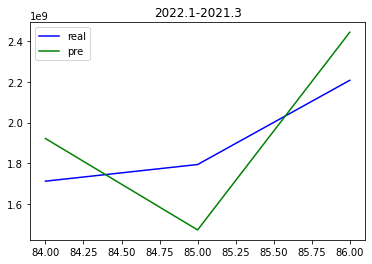

In [12]:
# 划分训练部分，train——>训练数据（2017.1-2021.12）
train=  Alldata[:-3]



# 模型训练
m = NeuralProphet(seasonality_mode="multiplicative")
metrics = m.fit(train, freq="MS")



# 预测2022.1/2/3
forecast_len = 3
future = m.make_future_dataframe(df=train, periods=forecast_len, n_historic_predictions=len(train))
forecast = m.predict(df=future)

df = pd.DataFrame([Alldata.y[-forecast_len:],  forecast.yhat1[-forecast_len:]], index=['real', 'predict']).T
df.index = Alldata.ds[-forecast_len:]


# 可视化
plt.plot(Alldata.y[-forecast_len:], 'b', label='real')
plt.plot(forecast.yhat1[-forecast_len:], 'g', label='pre')
plt.title('2022.1-2021.3')
plt.legend()
df

# 预测2021.7-2021.12

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.744% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 633


  0%|          | 0/106 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.87E+00, min: 1.81E-01


  0%|          | 0/106 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.93E+00, min: 1.81E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.21E-01
Epoch[633/633]: 100%|████| 633/633 [00:07<00:00, 90.10it/s, SmoothL1Loss=0.00131, MAE=8.36e+7, RMSE=1.33e+8, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.744% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.476% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.476% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


,real,predict
ds,,
2021/7/1,1.537618e+09,1.596164e+09
2021/8/1,1.927191e+09,1.887951e+09
2021/9/1,1.851000e+09,1.874966e+09
2021/10/1,1.844719e+09,1.606514e+09
2021/11/1,4.211548e+09,4.039263e+09
2021/12/1,2.034786e+09,1.854397e+09


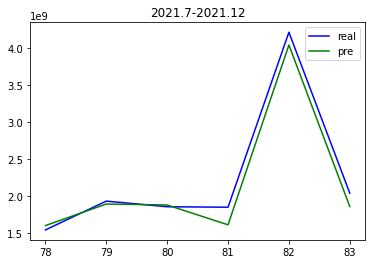

In [15]:
# 划分训练部分，train——>训练数据（2017.1-2021.6）
train=  Alldata[:-9]


# 模型训练
m = NeuralProphet(seasonality_mode="multiplicative" )
metrics = m.fit(train, freq="MS")


# 预测2021.7-2021.12
future = m.make_future_dataframe(df=train, periods=6, n_historic_predictions=len(train))
forecast = m.predict(df=future)

df = pd.DataFrame([Alldata.y[-9:-3],  forecast.yhat1[-6:]], index=['real', 'predict']).T
df.index = Alldata.ds[-9:-3]


# 可视化
plt.plot(Alldata.y[-9:-3], 'b', label='real')
plt.plot(forecast.yhat1[-6:], 'g', label='pre')
plt.title('2021.7-2021.12')
plt.legend()
df

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.278% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 668


  0%|          | 0/105 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.27E+00, min: 3.09E-01


  0%|          | 0/105 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.39E-01, min: 2.53E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.16E-01
Epoch[668/668]: 100%|████| 668/668 [00:07<00:00, 86.86it/s, SmoothL1Loss=0.00187, MAE=7.35e+7, RMSE=1.01e+8, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.278% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.744% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 89.744% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


,real,predict
ds,,
2021/1/1,2.095861e+09,1.878579e+09
2021/2/1,1.301106e+09,1.738105e+09
2021/3/1,2.414090e+09,2.762111e+09
2021/4/1,1.798340e+09,2.191002e+09
2021/5/1,1.743504e+09,2.120316e+09
2021/6/1,3.094749e+09,3.399444e+09


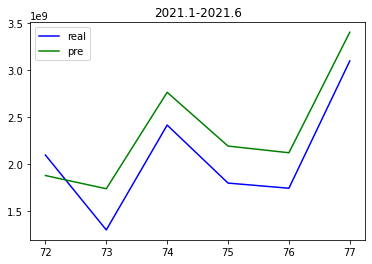

In [16]:
# 划分训练部分，train——>训练数据（2017.1-2021.6）
train=  Alldata[:-15]


# 模型训练
m = NeuralProphet(seasonality_mode="multiplicative")
metrics = m.fit(train, freq="MS")


# 预测2021.1-2021.6
future = m.make_future_dataframe(df=train, periods=6, n_historic_predictions=len(train))
forecast = m.predict(df=future)

df = pd.DataFrame([Alldata.y[-15:-9],  forecast.yhat1[-6:]], index=['real', 'predict']).T
df.index = Alldata.ds[-15:-9]


# 可视化
plt.plot(Alldata.y[-15:-9], 'b', label='real')
plt.plot(forecast.yhat1[-6:], 'g', label='pre')
plt.title('2021.1-2021.6')
plt.legend()
df